In [ ]:
from google.colab import files
uploaded=files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
import pandas as pd
temp=pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [ ]:
temp.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
a={"F1":temp['age'],"F2":temp['thalach']}
df=pd.DataFrame(a)
df.head()

,F1,F2
0,63,150
1,37,187
2,41,172
3,56,178
4,57,163


In [ ]:
import numpy as np

centroids=[]

centroids.append(list(df.iloc[1]))
centroids.append(list(df.iloc[4]))

distances=np.zeros([2,len(df)])
distances
cluster=[[],[]]

previous_clusters=[]
previous_centroids=[]


v=0
while(1):
  v=v+1
  previous_clusters.append(list(cluster))
  previous_centroids.append(list(centroids))
  for i in range(len(distances)):
    for j in range(len(df)):
      dist=np.linalg.norm(np.array(centroids[i])-np.array(df.iloc[j]))
      
      distances[i,j]=dist
  cluster=[[],[]]
  for i in range(len(df)):
    if distances[0,i]<=distances[1,i]:
      cluster[0].append(i)
    else:
      cluster[1].append(i)
  
  
  for i in range(len(cluster)):
    c_x=0
    c_y=0
    for j in cluster[i]:
      c_x+=df.iloc[j,0]
      c_y+=df.iloc[j,1]
    centroids[i][0]=c_x/len(cluster[i])
    centroids[i][1]=c_y/len(cluster[i])

  if cluster==previous_clusters[-1]:
    break


In [ ]:
print(" Clusters 1 : ",cluster[0]," Cluster 2 : ",cluster[1])

print("Centroids  :  ",centroids)



 Clusters 1 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 32, 33, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 90, 91, 92, 93, 96, 97, 98, 99, 100, 102, 103, 104, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 127, 128, 130, 131, 132, 133, 134, 135, 140, 141, 142, 146, 147, 148, 149, 152, 153, 154, 156, 157, 159, 160, 161, 162, 163, 164, 167, 169, 171, 172, 173, 176, 177, 182, 183, 185, 188, 189, 194, 196, 197, 199, 200, 203, 205, 207, 209, 210, 219, 220, 222, 228, 230, 235, 236, 237, 238, 239, 245, 246, 248, 255, 258, 259, 260, 261, 263, 273, 275, 278, 281, 283, 286, 287, 290, 293, 302]  Cluster 2 :  [11, 13, 17, 23, 27, 31, 34, 40, 43, 48, 52, 60, 63, 66, 84, 89, 94, 95, 101, 105, 106, 112, 120, 126, 129, 136, 137, 138, 139, 143, 144, 145, 150, 151, 155, 158,

In [ ]:
f={"F1":[centroids[0][0],centroids[1][0]],"F2":[centroids[0][1],centroids[1][1]]}
kf=pd.DataFrame(f)

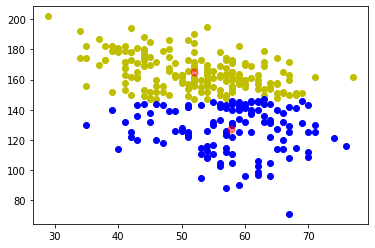

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(df)):
  if i in cluster[0]:
    color='y'
  else:
    color='b'
  plt.scatter(df.iloc[i,0],df.iloc[i,1],c=color)
plt.scatter(kf['F1'],kf['F2'], c='red', s=50,alpha=0.5)
plt.show()